### Diabetes Binary Classification Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Diabetes Dataset

Input Features: 'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age'

Target Feature: 'diabetes_class'

Objective: Predict diabetes_class for given input features

##### Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes 

In [4]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [5]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [6]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


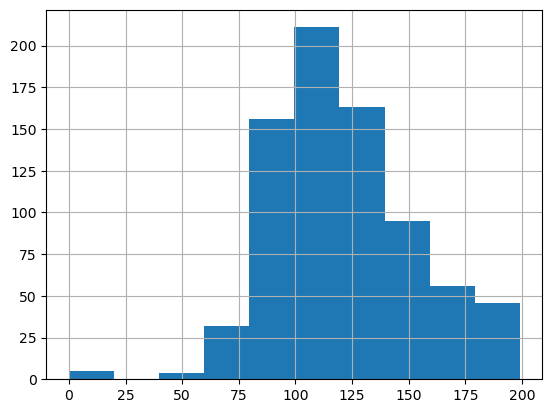

In [10]:
df['glucose_concentration'].hist()
plt.show()

In [11]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [12]:
#separate diabetic and normal samples

diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

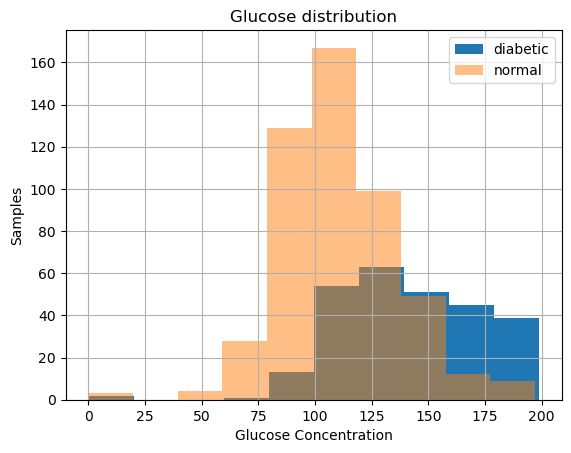

In [16]:
plt.hist(df[diabetic].glucose_concentration, label='diabetic')
plt.hist(df[normal].glucose_concentration, alpha=0.5, label='normal')
plt.grid()
plt.xlabel('Glucose Concentration')
plt.ylabel('Samples')
plt.title('Glucose distribution')
plt.legend()
plt.show()

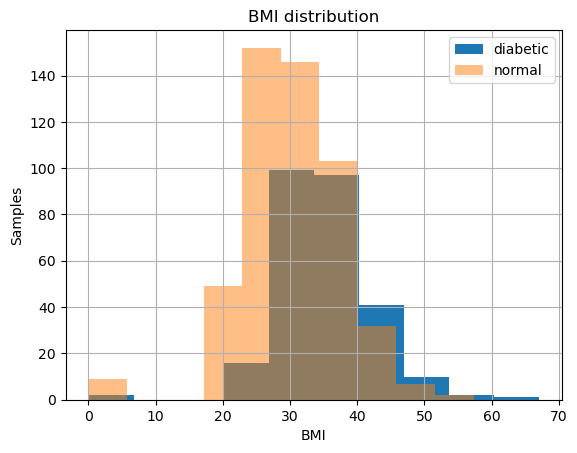

In [17]:
# BMI histogram

plt.hist(df[diabetic].bmi, label='diabetic')
plt.hist(df[normal].bmi, alpha=0.5, label='normal' )
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.title('BMI distribution')
plt.legend()
plt.show()

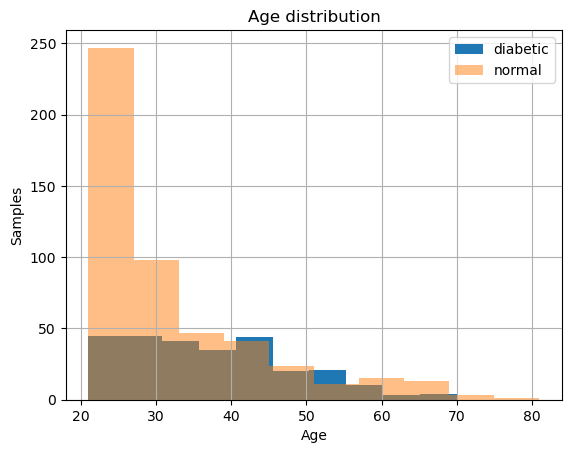

In [18]:
# Age histogram

plt.hist(df[diabetic].age, label='diabetic')
plt.hist(df[normal].age, alpha=0.5, label='normal' )
plt.grid()
plt.xlabel('Age')
plt.ylabel('Samples')
plt.title('Age distribution')
plt.legend()
plt.show()

### Training and Validation dataset

- Training dataset will not have column headers

- Target variable as first column followed by input features

       'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age'

In [20]:
# Randomize the dataset

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]


In [21]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
567,6,92,62,32,126,32.0,0.085,46,0
123,5,132,80,0,0,26.8,0.186,69,0
615,3,106,72,0,0,25.8,0.207,27,0
492,4,99,68,38,0,32.8,0.145,33,0
288,4,96,56,17,49,20.8,0.340,26,0


In [22]:
# 70% of data is for Training
# 30% is for validation

rows = df.shape[0]
train = int(rows*0.7)
validation = rows - train


In [23]:
rows, train, validation

(768, 537, 231)

In [26]:
# write data to Training csv
df[:train].to_csv('diabetes_train.csv',index=False, header=False, columns=columns)

In [27]:
# write data to Training csv
df[train:].to_csv('diabetes_validation.csv',index=False, header=False, columns=columns)

In [28]:
# write columns list in file
with open('diabetes_training_column_list.txt','w') as f:
    f.write(','.join(columns))